## Text Detection using Tesseract

### Import Statements

In [28]:
import cv2
import pytesseract
from IPython.display import Image

In [29]:
# sample image file
img_file = '../../data/creative_assets/0c1a2c286a6818e1354c2b655f68da09-ffb622dd70303838b356.png'

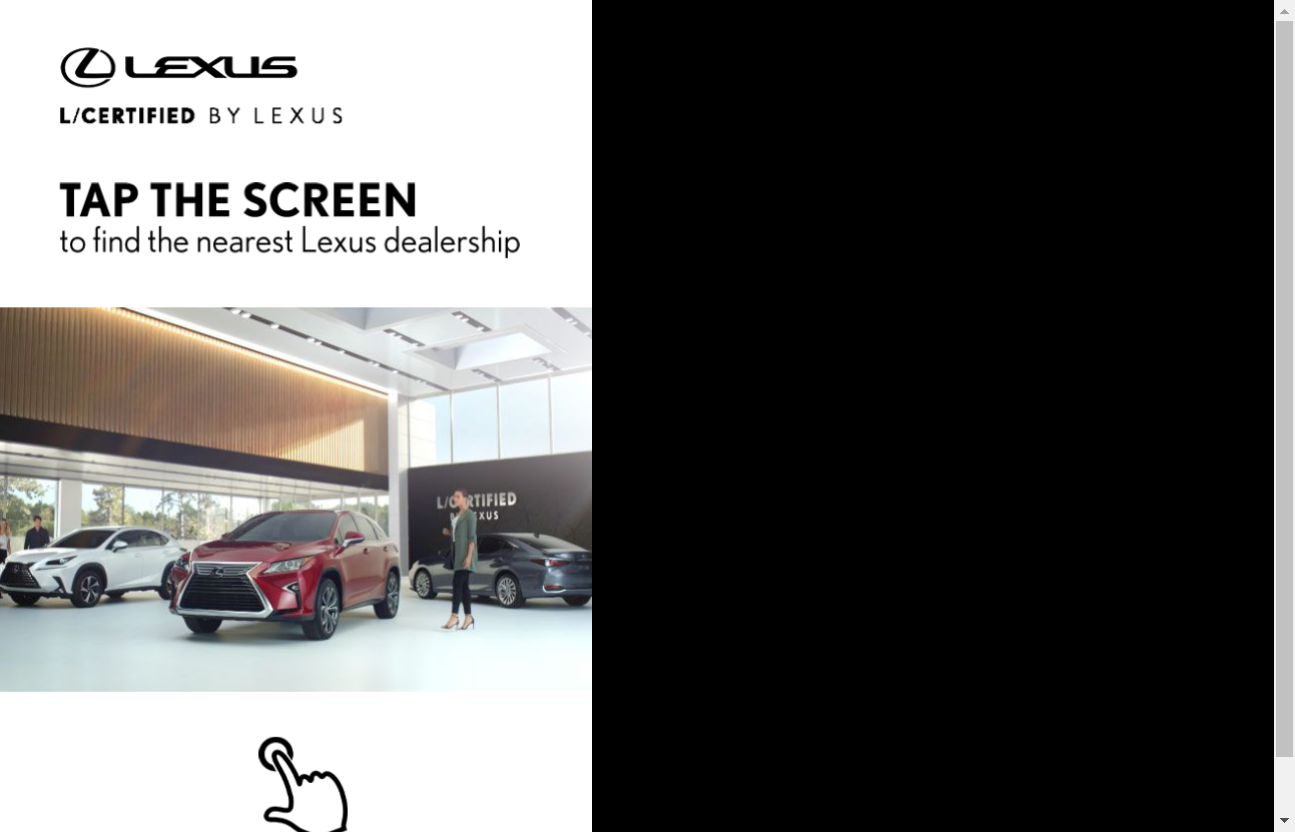

In [30]:
# preview image
img = cv2.imread(img_file)
Image(filename=img_file)

### Preprocessing

In [31]:
# gray scale
def gray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(r"../../data/creative_assets/preprocess/tesseract/img_gray.png",img)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    cv2.imwrite(r"../../data/creative_assets/preprocess/tesseract/img_blur.png",img)
    return img_blur

# threshold
def threshold(img):
    # pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    cv2.imwrite(r"../../data/creative_assets/preprocess/tesseract/img_threshold.png",img)
    return img

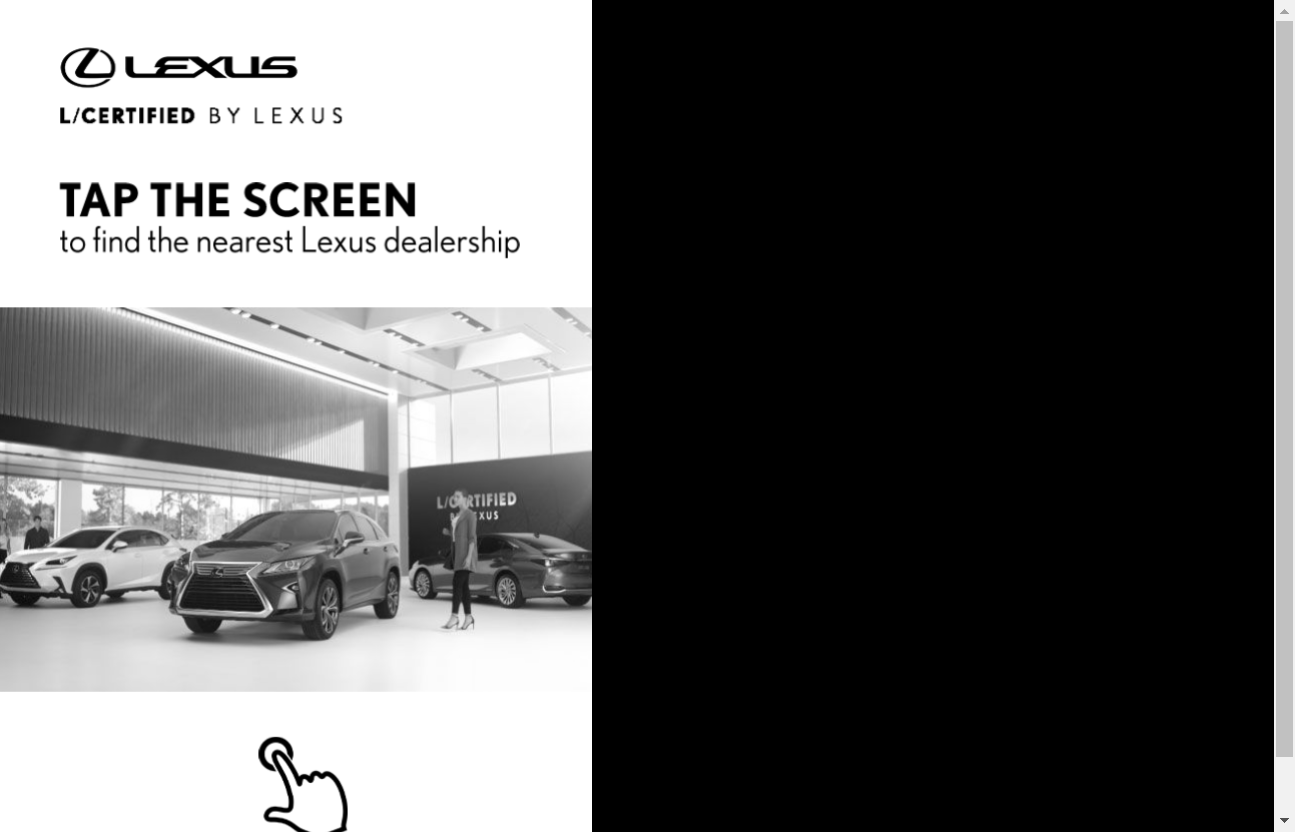

In [32]:
# preview gray scaled image
im_gray = gray(img)
Image(filename='../../data/creative_assets/preprocess/tesseract/img_gray.png')

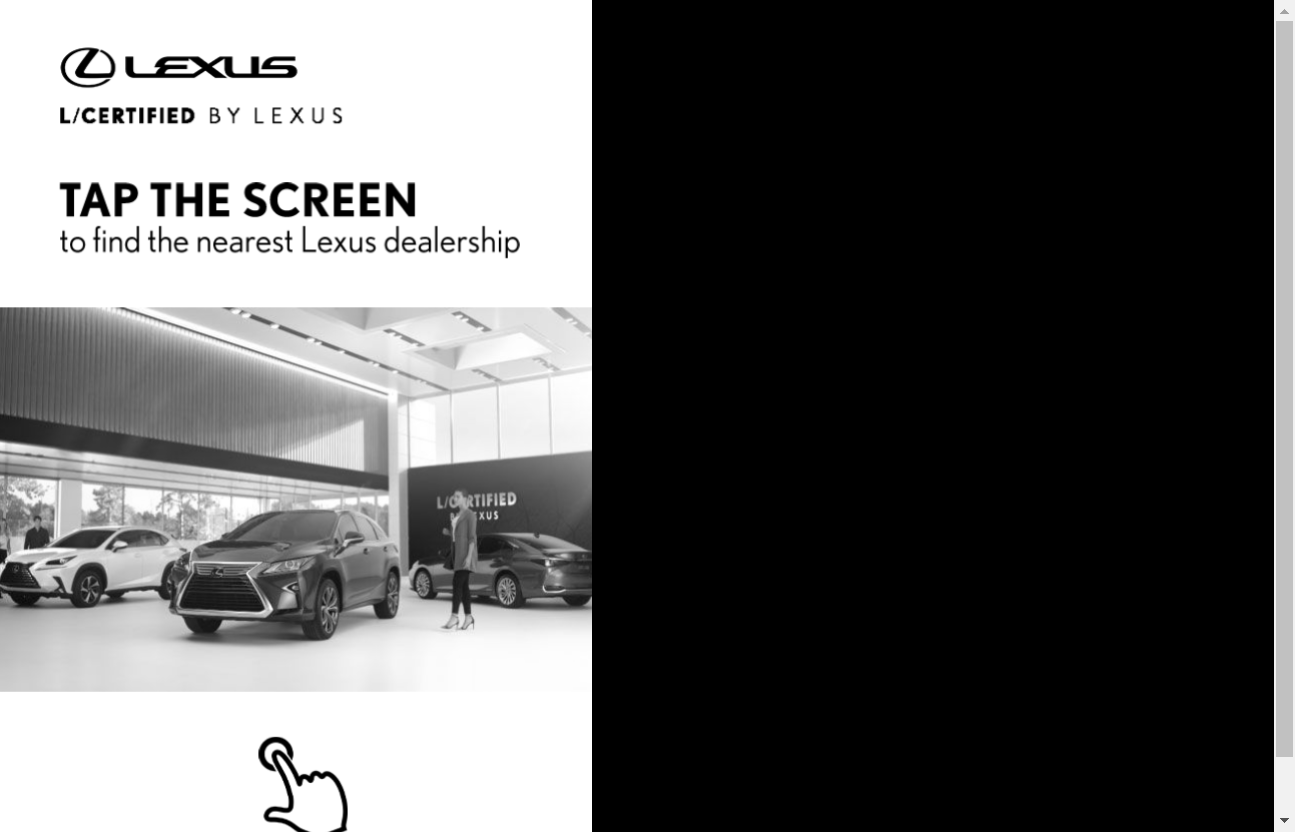

In [33]:
# preview gray scaled and blurred image
im_blur = blur(im_gray)
Image(filename='../../data/creative_assets/preprocess/tesseract/img_blur.png')

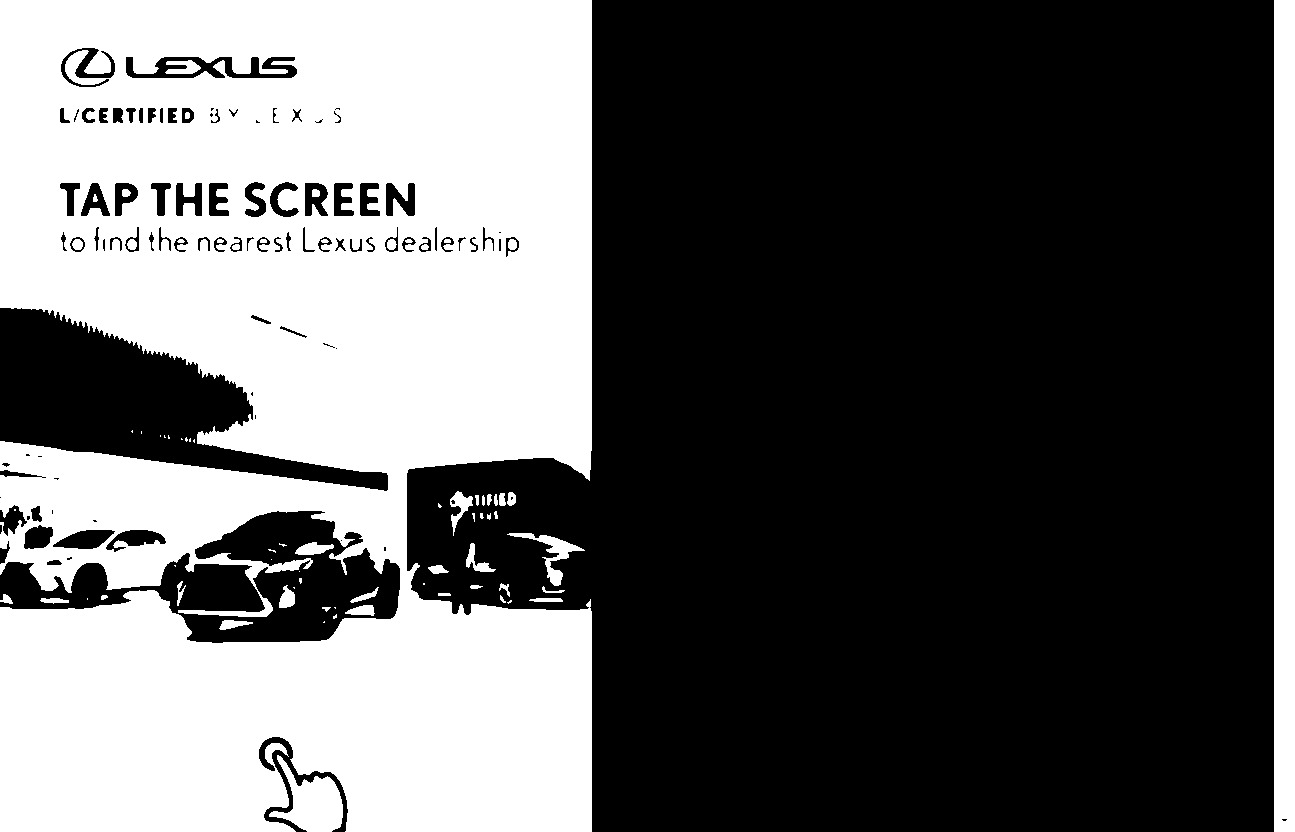

In [34]:
# preview gray scaled, blurred, and thresh image
im_thresh = threshold(im_blur)
Image(filename='../../data/creative_assets/preprocess/tesseract/img_threshold.png')

In [35]:
# find curves joining all the continuous points, having same color or intensity
contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

### Text Detection using OpenCV and Google’s Tesseract

###### Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine

In [36]:
# initialize empty list to hold detected text
detected_text_list = []
def contours_text(original_img, contours):
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 255), 2)

        # cv2.imshow('cnt',rect)
        # cv2.waitKey()
        cv2.imwrite(r"../data/creative_assets/preprocess/tesseract/img_cnt.png",rect)

        # Cropping the text block for giving input to OCR
        cropped = original_img[y:y + h, x:x + w]

        # Apply OCR on the cropped image
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config)
        print(text)
        detected_text_list.append(text)

In [37]:
# detect text from image
contours_text(original_img= img, contours=contours)














































a S'












Ovexus
L/CERTIFIED BY LEXUS

TAP THE SCREEN

to find the nearest Lexus dealership




In [38]:
# detected text list
detected_text_list

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 "a S'\n\n",
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN\n\nto find the nearest Lexus dealership\n\n']

In [39]:
# filtered detected text list
filtered_detected_text_list = list(filter(None, detected_text_list))
filtered_detected_text_list

["a S'\n\n",
 'Ovexus\nL/CERTIFIED BY LEXUS\n\nTAP THE SCREEN\n\nto find the nearest Lexus dealership\n\n']

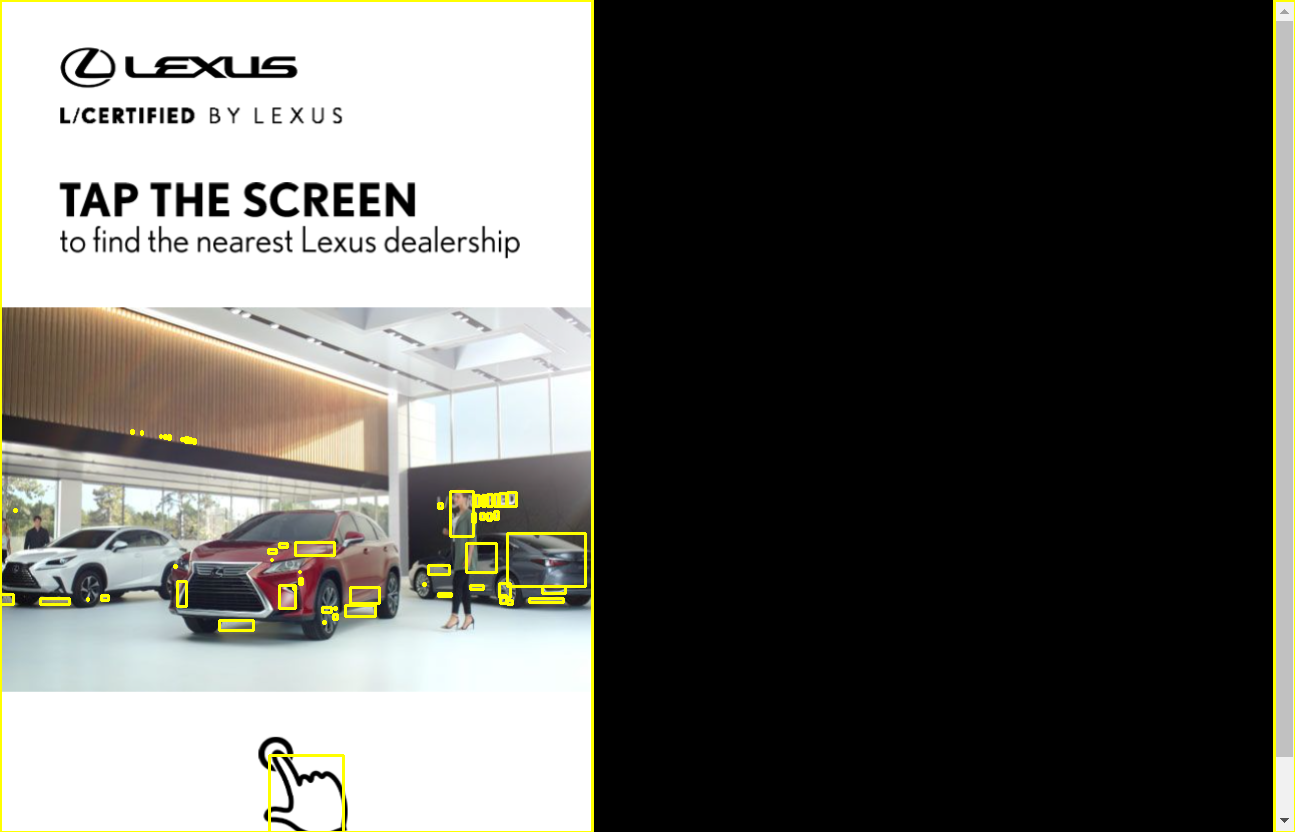

In [40]:
# preview image with contours
im_gray = gray(img)
Image(filename='../../data/creative_assets/preprocess/tesseract/img_cnt.png')